# Prelude

In [80]:
import matplotlib.pyplot as plt
import json
import numpy as np
import random

In [ ]:
# load in player 1 policy
p1 = open('./policies/logs_582023_19237/readable_policy_p1.txt')
p1 = json.load(p1)

In [ ]:
base = "[0. 0. 0. 0. 0. 0. 0. 0. 0.]"
all = []
for i in range(1, len(base), 3):
  tmp = base
  tmp = tmp[:i] + '1' + tmp[i+1:]
  all.append(tmp)
   
stateOne = {}
for key in p1:
  if key in all: stateOne[key] = p1[key]

In [ ]:
print(f"#  {stateOne['[1. 0. 0. 0. 0. 0. 0. 0. 0.]']:.2f}|{stateOne['[0. 1. 0. 0. 0. 0. 0. 0. 0.]']:.2f}|{stateOne['[0. 0. 1. 0. 0. 0. 0. 0. 0.]']:.2f}")
print(f"#  ----+----+----")
print(f"#  {stateOne['[0. 0. 0. 1. 0. 0. 0. 0. 0.]']:.2f}|{stateOne['[0. 0. 0. 0. 1. 0. 0. 0. 0.]']:.2f}|{stateOne['[0. 0. 0. 0. 0. 1. 0. 0. 0.]']:.2f}")
print(f"#  ----+----+----")
print(f"#  {stateOne['[0. 0. 0. 0. 0. 0. 1. 0. 0.]']:.2f}|{stateOne['[0. 0. 0. 0. 0. 0. 0. 1. 0.]']:.2f}|{stateOne['[0. 0. 0. 0. 0. 0. 0. 0. 1.]']:.2f}")


ok I want to make a display starting from player 1 to the end of the game where best move is green and worst move is red and everyting else is gradually in between

In [ ]:
# Extract values from the dictionary and reshape into a 3x3 grid
values = np.array(list(stateOne.values())).reshape(3, 3)
print(values)

# Create the heatmap with color spectrum
plt.imshow(values, cmap='RdYlGn', vmin=np.min(values), vmax=np.max(values))

# optionally show colorbar to indicate the value range
plt.colorbar()

# Add the percentages inside each cell
for i in range(3):
    for j in range(3):
        plt.text(j, i, f"{values[i, j]:.2f}", ha='center', va='center', color='black', fontsize=15)

# Set the axis labels
plt.xticks(range(3), ['0', '1', '2'])
plt.yticks(range(3), ['0', '1', '2'])

# Show the plot
plt.show()

# The Real Beef

In [111]:
# loading p1/p2 policies to simulate a game between 2 bots
# p1 p2 p1 p2 p1 p2 p1 p2 p1

### some cleaning to the files had to be done to run the analysis
# - replace all double quote followed by space with double quote
# - replace all two spaces with one space
# - replace all square bracket followed by space with square bracket

p1 = json.load(open('./policies/logs_582023_19237/readable_policy_p1.txt'))
p2 = json.load(open('./policies/logs_582023_19237/readable_policy_p2.txt'))

In [118]:
# we want generate all possibile positions from base, then select max, then repeat
# this way we get the 'ideal' game effectively
board = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

states = {}

counter = 0
while(counter <= len(board)):
  policy, mark = p2, -1
  if counter % 2 == 0: policy, mark = p1, 1
  
  tmp_dict = {}
  for i in range(0, len(board), 1):
    tmp = np.copy(board)
    if tmp[i] == 0:
      tmp[i] = mark
      # do not ask about why I need the replace :)
      # you may choose to remove them and experience the wrath of numpy and json
      tmp_dict[f"{tmp}"] = policy[f"{tmp}".replace("  ", " ").replace("[ ", "[")]
    else:
      tmp_dict[f"{i}"] = 0

  board = max(tmp_dict, key=tmp_dict.get).replace("[", "").replace("]", "").replace(".", "")
  board = np.fromstring(board, dtype=float, sep=' ')
  states[f"{counter}"] = tmp_dict
  
  counter += 1

# Serializing json  
jsonObj = json.dumps(states, indent=4)
with open("states.json", "wt") as outfile:
    outfile.write(jsonObj)

In [83]:
def heatMap(stateOne):
  # Extract values from the dictionary and reshape into a 3x3 grid
  values = np.array(list(stateOne.values())).reshape(3, 3)
  print(values)

  # Create the heatmap with color spectrum
  plt.imshow(values, cmap='RdYlGn', vmin=np.min(values), vmax=np.max(values))

  # optionally show colorbar to indicate the value range
  plt.colorbar()

  # Add the percentages inside each cell
  for i in range(3):
      for j in range(3):
          plt.text(j, i, f"{values[i, j]:.2f}", ha='center', va='center', color='black', fontsize=15)

  # Set the axis labels
  plt.xticks(range(3), ['0', '1', '2'])
  plt.yticks(range(3), ['0', '1', '2'])

  # Show the plot
  plt.show()
  return None

In [119]:
f = open("./states.json")
jsonObj = json.load(f)
f.close()

[[0.20579203 0.16986053 0.25255064]
 [0.18208539 0.39372238 0.24982597]
 [0.24366662 0.23104658 0.1961919 ]]


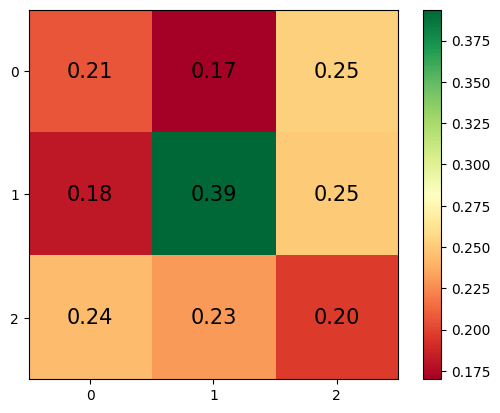

[[0.16618936 0.12451559 0.12961986]
 [0.16987157 0.         0.12194559]
 [0.18804776 0.10877083 0.18324616]]


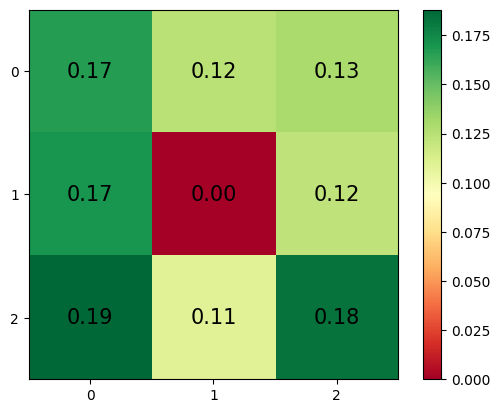

[[0.40722116 0.2889714  0.18314912]
 [0.23792422 0.         0.26229656]
 [0.         0.195467   0.25108795]]


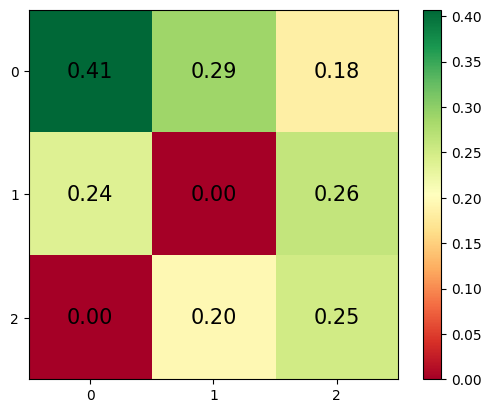

[[0.         0.00602577 0.0551759 ]
 [0.01839254 0.         0.08480944]
 [0.         0.07349344 0.22744501]]


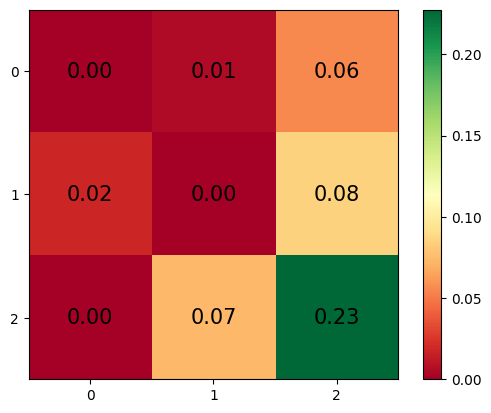

[[0.         0.01310184 0.25596299]
 [0.05486425 0.         0.21171211]
 [0.         0.33747341 0.        ]]


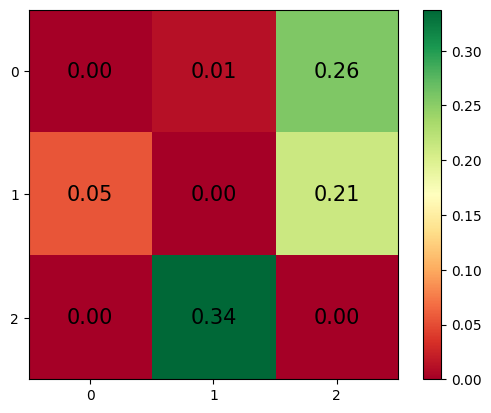

[[0.         0.24503736 0.0024347 ]
 [0.00387519 0.         0.00454306]
 [0.         0.         0.        ]]


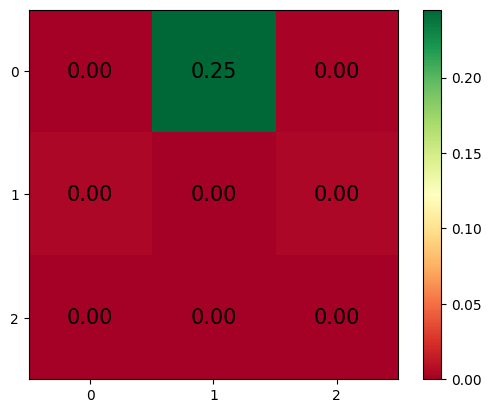

[[0.         0.         0.081     ]
 [0.3961968  0.         0.08204527]
 [0.         0.         0.        ]]


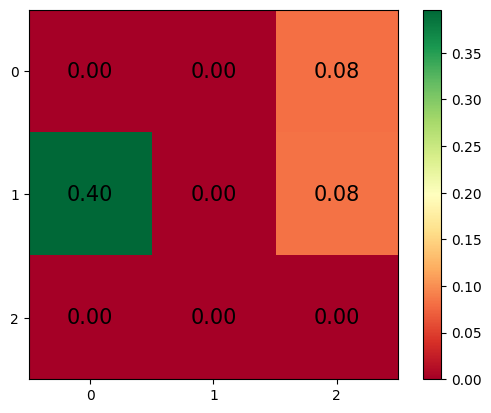

[[0.   0.   0.  ]
 [0.   0.   0.45]
 [0.   0.   0.  ]]


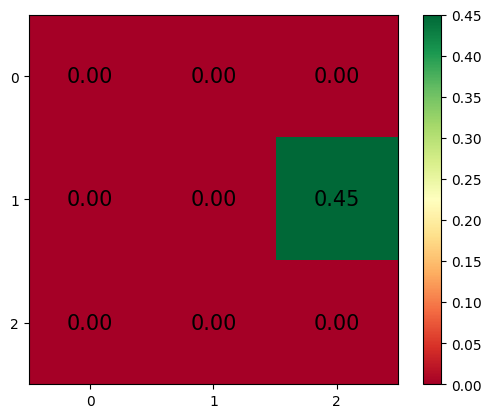

[[0.   0.   0.09]
 [0.   0.   0.  ]
 [0.   0.   0.  ]]


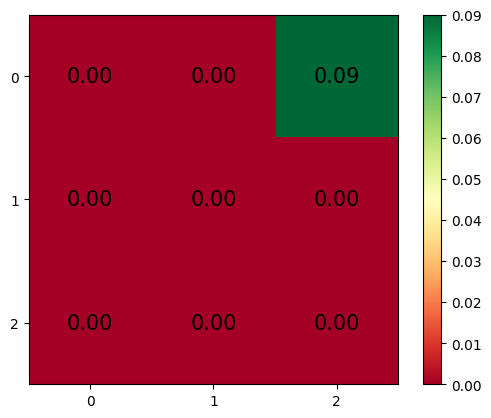

In [121]:
for i in range(0, 9, 1):
  heatMap(jsonObj[f"{i}"])
